# SQL Server Ground to Cloud Security Workshop

_Last Updated: 3 August 2022_

In [this workshop](https://github.com/David-Seis/SecureYourAzureData) you'll cover the basics of securing SQL Server installations and databases, from on-premises systems to Microsoft Azure deployments.

_Note that this Notebook is an example only; and should not be used in production. It should be evaluated as a training implement only, and you should use these scripts and statements in a read-only fashion on a test system not connected to your production environment._

In [4]:
/* Module 2, Connect to test Server */
SELECT @@SERVERNAME AS [Server Name]
SELECT SERVERPROPERTY('MACHINENAME') AS [Machine Name]

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.003

Server Name
A1


Machine Name
A1


# Module 2 - SQL Server Security Basics

Activities from the [SQL Server Security Course](https://github.com/David-Seis/SecureYourAzureData), for [Module 2](https://github.com/David-Seis/SecureYourAzureData/blob/main/SQLSecurity/02%20-%20SQLServerSecurityBasics.md).

## 2.2 Principals

Step 1: Create a test database named "SQLSecurityTest" to hold all of the examples we will be working through today:

In [5]:
/* Module 2, Activity 1 - Create a test database */

CREATE DATABASE SQLSecurityTest;
GO

SELECT name, create_date, state_desc 
FROM sys.databases

Commands completed successfully.

(5 rows affected)

Total execution time: 00:00:01.207

name,create_date,state_desc
master,2003-04-08 09:13:36.390,ONLINE
tempdb,2022-08-23 19:16:34.857,ONLINE
model,2003-04-08 09:13:36.390,ONLINE
msdb,2019-09-24 14:21:42.270,ONLINE
SQLSecurityTest,2022-08-23 21:06:00.603,ONLINE


Step 2: Open the "SamplePythonCodeNotebook" notebook and create the two windows users:

Step 3: Create a set of users in your SQL environment in a new query window, you will need to replace -Placeholder- with your device name. Remember, these are test users and are not designed to be secure.

In [7]:
/* Module 2, Activity 1 - Add Test users */

USE [master]
GO
CREATE LOGIN [-Placeholder-\User1] FROM WINDOWS WITH DEFAULT_DATABASE=[SQLSecurityTest]
GO

USE [SQLSecurityTest]
GO
CREATE USER [-Placeholder-\User1] FOR LOGIN [-Placeholder-\User1]
GO

USE [master]
GO
CREATE LOGIN [-Placeholder-\User2] FROM WINDOWS WITH DEFAULT_DATABASE=[SQLSecurityTest]
GO

USE [SQLSecurityTest]
GO
CREATE USER [-Placeholder-\User2] FOR LOGIN [-Placeholder-\User2]
GO

USE [master]
GO
CREATE LOGIN [User3] WITH PASSWORD=N'Tes#20. Use32!', DEFAULT_DATABASE=[SQLSecurityTest], CHECK_EXPIRATION=OFF, CHECK_POLICY=OFF
GO

USE [SQLSecurityTest]
GO
CREATE USER [User3] FOR LOGIN [User3]
GO

USE [master]
GO
CREATE LOGIN [User4] WITH PASSWORD=N'Tes#20. Use42!', DEFAULT_DATABASE=[SQLSecurityTest], CHECK_EXPIRATION=OFF, CHECK_POLICY=OFF
GO

USE [SQLSecurityTest]
GO
CREATE USER [User4] FOR LOGIN [User4]
GO

--sp_adduser is DEPRECATED

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.011

In [8]:
/* Module 2, Activity 1 - Review and created users and role memberships */

EXEC sp_helplogins


--Find Role Memberships 
SELECT DP1.name AS ServerRoleName,   
    isnull (DP2.name, 'No members') AS ServerUserName   
FROM sys.server_role_members AS DRM  
RIGHT OUTER JOIN sys.server_principals AS DP1  
    ON DRM.role_principal_id = DP1.principal_id  
LEFT OUTER JOIN sys.server_principals AS DP2  
    ON DRM.member_principal_id = DP2.principal_id  
WHERE DP1.type = 'R'
ORDER BY DP1.name; 

(20 rows affected)

(20 rows affected)

(16 rows affected)

Total execution time: 00:00:00.864

LoginName,SID,DefDBName,DefLangName,AUser,ARemote
##MS_AgentSigningCertificate##,0x0106000000000009010000004C1967C27FEB2EAD332894C5A0779EAE202847C8,master,us_english,yes,no
##MS_PolicyEventProcessingLogin##,0x5681CCE7A1F1FF41B2F95CED7D792E70,master,us_english,yes,no
##MS_PolicySigningCertificate##,0x010600000000000901000000BB1B6130E13E5B67B7BD49CE40730A5B67188088,master,NULL,NO,no
##MS_PolicyTsqlExecutionLogin##,0x27578D8516843E4094EFA2CEED085C82,master,us_english,yes,no
##MS_SmoExtendedSigningCertificate##,0x010600000000000901000000DCFDCE5B748D5515E793FC84E1ECCBE22A187F7A,master,NULL,NO,no
##MS_SQLAuthenticatorCertificate##,0x010600000000000901000000FB236D83A8DC8E7DE549C56382C1A25F85EA3704,master,NULL,NO,no
##MS_SQLReplicationSigningCertificate##,0x010600000000000901000000ED1B6318A0592D96CE6D143A9184BE0F758287BE,master,NULL,NO,no
##MS_SQLResourceSigningCertificate##,0x0106000000000009010000001E501960278B270FD34191426BF0193FC0B4E786,master,NULL,NO,no
A1\Administrator,0x01050000000000051500000036DA95C338EC704F7A49A0B6F4010000,master,us_english,yes,no
A1\User1,0x01050000000000051500000036DA95C338EC704F7A49A0B60F040000,SQLSecurityTest,us_english,yes,no


LoginName,DBName,UserName,UserOrAlias
##MS_AgentSigningCertificate##,master,##MS_AgentSigningCertificate##,User
##MS_PolicyEventProcessingLogin##,master,##MS_PolicyEventProcessingLogin##,User
##MS_PolicyEventProcessingLogin##,msdb,##MS_PolicyEventProcessingLogin##,User
##MS_PolicyEventProcessingLogin##,msdb,PolicyAdministratorRole,MemberOf
##MS_PolicyTsqlExecutionLogin##,msdb,##MS_PolicyTsqlExecutionLogin##,User
##MS_PolicyTsqlExecutionLogin##,msdb,PolicyAdministratorRole,MemberOf
A1\Administrator,SQLSecurityTest,db_owner,MemberOf
A1\Administrator,SQLSecurityTest,dbo,User
A1\User1,SQLSecurityTest,A1\User1,User
A1\User2,SQLSecurityTest,A1\User2,User


ServerRoleName,ServerUserName
bulkadmin,No members
dbcreator,No members
diskadmin,No members
examplerole,No members
processadmin,No members
public,No members
securityadmin,No members
serveradmin,No members
setupadmin,No members
SQLSecurityTest_Table_Owner,No members


## 2.2.1 Roles

Step 1: Create one server role and 2 database roles:

In [10]:
/*  Module 2, Activity 2 - Create a server role and database roles */

-- Create a server role that will eventually own a table in the database
USE master;
CREATE SERVER ROLE SQLSecurityTest_Table_Owner;

-- Create a database role that will eventually have rights to execute a stored procedure in the database
USE [SQLSecurityTest];
CREATE ROLE Stored_procedure_user_role;

--Create a database role that will have permisison to query a view in the database
USE [SQLSecurityTest];
CREATE ROLE View_user_role;

Commands completed successfully.

Total execution time: 00:00:00.005

Step 2: Assign users to roles. Remember to change the computer name from '-Placeholder-' in all the relevant places if you are running this on your own device.

In [11]:
/*  Module 2, Activity 2 - Add users to roles */

--Add user 1 to the Server role
ALTER SERVER ROLE [SQLSecurityTest_Table_Owner] ADD MEMBER [-Placeholder-\User1]
GO


--Add user 2 and 3 to the stored procedure user role
USE [SQLSecurityTest]
GO
ALTER ROLE [Stored_procedure_user_role] ADD MEMBER [-Placeholder-\User2]
GO

USE [SQLSecurityTest]
GO
ALTER ROLE [Stored_procedure_user_role] ADD MEMBER [User3]
GO


--Add user 1 and 4 to the View user role
USE [SQLSecurityTest]
GO
ALTER ROLE [View_user_role] ADD MEMBER [-Placeholder-\User1]
GO

USE [SQLSecurityTest]
GO
ALTER ROLE [View_user_role] ADD MEMBER [User4]
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.005

Step 3: Run this script to identify all user created roles on the SQL instance, as well as identify role memberships

_Note: You can remove 'AND is\_fixed\_role = 0  AND name NOT IN ('public')' to see all server and database roles on the instance._

In [13]:
/*  Module 2, Activity 2 - Audit all user created roles on the system, as well as role memberships */
--Server Principals
SELECT name, type_desc, create_date FROM sys.server_principals
WHERE type = 'R' AND is_fixed_role = 0 AND name NOT IN ('public')

--Database Principals
SELECT name, type_desc, create_date FROM sys.database_principals 
WHERE type = 'R' AND is_fixed_role = 0  AND name NOT IN ('public')

--Find Role Memberships 
SELECT DP1.name AS DatabaseRoleName,   
    isnull (DP2.name, 'No members') AS DatabaseUserName   
FROM sys.database_role_members AS DRM  
RIGHT OUTER JOIN sys.database_principals AS DP1  
    ON DRM.role_principal_id = DP1.principal_id  
LEFT OUTER JOIN sys.database_principals AS DP2  
    ON DRM.member_principal_id = DP2.principal_id  
WHERE DP1.type = 'R'
ORDER BY DP1.name; 

(1 row affected)

(2 rows affected)

(14 rows affected)

Total execution time: 00:00:00.008

name,type_desc,create_date
SQLSecurityTest_Table_Owner,SERVER_ROLE,2022-08-23 21:10:40.163


name,type_desc,create_date
Stored_procedure_user_role,DATABASE_ROLE,2022-08-23 21:10:40.163
View_user_role,DATABASE_ROLE,2022-08-23 21:10:40.167


DatabaseRoleName,DatabaseUserName
db_accessadmin,No members
db_backupoperator,No members
db_datareader,No members
db_datawriter,No members
db_ddladmin,No members
db_denydatareader,No members
db_denydatawriter,No members
db_owner,dbo
db_securityadmin,No members
public,No members


Step 4: Run this script to identify all user-created SQL users and group them by type.

_Note: You can remove the 'WHERE type..." and the following arguments to see all SQL users on the instance._

In [14]:
/*  Module 2, Activity 2 - List all users by whether they are SQL or Windows users, excluding any built-in users */

-- Windows Logins
SELECT name, type_desc, create_date, default_database_name FROM sys.server_principals 
WHERE type IN ('U','G', 'E', 'X') AND name NOT LIKE '%NT%'
ORDER BY type

-- SQL Logins 
SELECT name, type_desc, create_date, default_database_name FROM sys.server_principals 
WHERE type = 'S' AND name NOT LIKE '%#%' AND name NOT LIKE 'sa'
ORDER BY type

(3 rows affected)

(2 rows affected)

Total execution time: 00:00:00.012

name,type_desc,create_date,default_database_name
A1\Administrator,WINDOWS_LOGIN,2022-07-05 17:38:25.683,master
A1\User1,WINDOWS_LOGIN,2022-08-23 21:09:43.487,SQLSecurityTest
A1\User2,WINDOWS_LOGIN,2022-08-23 21:09:43.490,SQLSecurityTest


name,type_desc,create_date,default_database_name
User3,SQL_LOGIN,2022-08-23 21:09:43.493,SQLSecurityTest
User4,SQL_LOGIN,2022-08-23 21:09:43.497,SQLSecurityTest


Step 5: Open the 'SamplePythonCodeNotebook' notebook to test the connections.

## 2.3 Securables

Step 1: Add a sample table to the test Database, view the data:

In [15]:
/*  Module 2, Activity 3 - Create a sample table */

USE [SQLSecurityTest]
    GO
    CREATE TABLE Patient (
    LoginID tinyint
    ,   LastName varchar(255)
    ,   FirstName varchar(255)
    ,   Address varchar(255)
    ,   City varchar(255)
    ,   SSN nvarchar(11)
    ,   CardNumber nvarchar(19)
    );

    INSERT INTO Patient (loginid, lastname, firstname, address, city, ssn, cardnumber)
    VALUES	
      (1,'Arbiter', 'Agatha', '111 Apple Ave.', 'Atlanta', '111-11-1111', '1111-1111-1111-1111')
      , (2, 'Bob', 'Billy', '222 Bayshore Blvd.', 'Boice', '222-22-2222', '2222-2222-2222-2222')
      , (3, 'Choice', 'Charley', '333 Castaway Ct.', 'Chesterfield', '333-33-3333', '3333-3333-3333-3333')
      , (4, 'Dangerfield', 'David', '4444 Denvue Drive', 'Denver', '444-44-4444', '4444-4444-4444-4444')
      , (5, 'Engleton', 'Edbert', '5555 Esquire Rd. E', 'Easton', '555-55-5555', '5555-5555-5555-5555')

Select * FROM Patient

Commands completed successfully.

(5 rows affected)

(5 rows affected)

Total execution time: 00:00:00.016

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111
2,Bob,Billy,222 Bayshore Blvd.,Boice,222-22-2222,2222-2222-2222-2222
3,Choice,Charley,333 Castaway Ct.,Chesterfield,333-33-3333,3333-3333-3333-3333
4,Dangerfield,David,4444 Denvue Drive,Denver,444-44-4444,4444-4444-4444-4444
5,Engleton,Edbert,5555 Esquire Rd. E,Easton,555-55-5555,5555-5555-5555-5555


Step 2: Create a view in the table, view the data.

In [16]:
/*  Module 2, Activity 3 - Create a sample view */
CREATE VIEW Patient_Mailing_Address AS
SELECT FirstName, LastName, Address, City
FROM Patient

Commands completed successfully.

Total execution time: 00:00:00.028

In [17]:
/*  Module 2, Activity 3 - Look at the typical return of the view */
SELECT * FROM Patient_Mailing_Address

(5 rows affected)

Total execution time: 00:00:00.005

FirstName,LastName,Address,City
Agatha,Arbiter,111 Apple Ave.,Atlanta
Billy,Bob,222 Bayshore Blvd.,Boice
Charley,Choice,333 Castaway Ct.,Chesterfield
David,Dangerfield,4444 Denvue Drive,Denver
Edbert,Engleton,5555 Esquire Rd. E,Easton


Step 3: Create a stored procedure in the database:

In [22]:
/*  Module 2, Activity 3 - Create a sample stored procedure */
USE SQLSecurityTest;  
GO  
CREATE PROCEDURE uspGetCardInformation   
    @Loginid tinyint  
AS   

    SET NOCOUNT ON;  
    SELECT cardnumber  
    FROM Patient  
    WHERE loginId= @loginId   
GO  


-- Execute the query to verify it works
EXEC dbo.uspGetCardInformation @loginID = 2

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.007

cardnumber
2222-2222-2222-2222


Step 4: Grant User1 full control on the table:

In [24]:
/*  Module 2, Activity 3 - Grant CONTROL on table to User1 */
USE [SQLSecurityTest]
GO
GRANT CONTROL ON [dbo].[Patient] TO [-Placeholder-\User1]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.001

Step 5: Grant rights to execute the stored procedure to the 'Stored\_procdure\_user\_role' role.

In [25]:
/*  Module 2, Activity 3 - Grant EXECUTE on table to Stored_procedure_user_role */
USE [SQLSecurityTest]
GO
GRANT EXECUTE ON [dbo].[uspGetCardInformation] TO [Stored_procedure_user_role]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.001

Step 6: Grant rights to use the view to the 'View\_user\_role' role.

In [26]:
/*  Module 2, Activity 3 - Grant SELECT on table to View_user_role */
USE [SQLSecurityTest]
GO
GRANT SELECT ON [dbo].[Patient_Mailing_Address] TO [View_user_role]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.001

Step 7: Open the 'SamplePythonCodeNotebook' notebook and execute test queries to see how the permisisons have affected the users.

Step 8: Review the results:

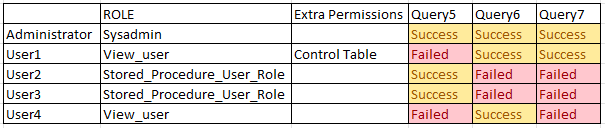  
Consider the permissions, and what was allowed based on the query and consider the presence of sensitive data.

query5 <span style="color: #000000;">=</span> <span style="color: #a31515;">"EXEC dbo.uspGetCardInformation @LoginID = 2"</span>

query6 <span style="color: #000000;">=</span> <span style="color: #a31515;">"SELECT FirstName + ' ' + Lastname + ' ' + Address + ' ' + City FROM Patient_Mailing_Address"</span>

query7 <span style="color: #000000;">=</span> <span style="color: #a31515;">"Select FirstName + ' ' + LastName +', ' + SSN FROM Patient"</span> <span style="color: #008000;">#this could be any combination of columns</span>

## 2.4 Applications

Step 1: Query the table as a general user using their login ID to see their account information:

In [27]:
/*  Module 2, Activity 4 - Select as a general user seeing account details */
SELECT * 
FROM Patient 
WHERE loginid = '1' 
-- user input = 1

(1 row affected)

Total execution time: 00:00:00.005

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111


Step 2: Run the query below which simulates what happens when an injection occurs:

In [28]:
/*  Module 2, Activity 4 - Select as a malicious actor using an injection string, which reveals all accounts in the system. */
SELECT * 
FROM Patient
WHERE loginid = '' or 1=1 --'  
-- user input = ' or 1=1 --  

(5 rows affected)

Total execution time: 00:00:00.003

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111
2,Bob,Billy,222 Bayshore Blvd.,Boice,222-22-2222,2222-2222-2222-2222
3,Choice,Charley,333 Castaway Ct.,Chesterfield,333-33-3333,3333-3333-3333-3333
4,Dangerfield,David,4444 Denvue Drive,Denver,444-44-4444,4444-4444-4444-4444
5,Engleton,Edbert,5555 Esquire Rd. E,Easton,555-55-5555,5555-5555-5555-5555


Step 3: Run the query below showing how parameterizing the query helps prevent injection strings allowed by an application from negatively affecting SQL server:

In [29]:
/*  Module 2, Activity 4 - Select as a general user after parameterizing the query */
DECLARE @Loginid tinyint

SET @Loginid = 1
--user input = 1
SELECT * 
FROM Patient
WHERE loginid = @Loginid --parameterized input

(1 row affected)

Total execution time: 00:00:00.003

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111


In [30]:
/*  Module 2, Activity 4 - Select as a malicious actor after parameterizing the query */
DECLARE @Loginid tinyint

SET @Loginid = '' or 1=1-- '
--user input = ' or 1=1-- 
SELECT * 
FROM Patient
WHERE loginid = @Loginid --parameterized input

: Msg 156, Level 15, State 1, Line 4
Incorrect syntax near the keyword 'or'.

Total execution time: 00:00:00

Step 4: Notice that an error could be returned to a malicious actor which they could use to learn more about your environment. Adding error handling helps prevent verbose errors from giving more information for an attacker to use.

In [31]:
/*  Module 2, Activity 4 - Select as a general user after adding error handling  */
DECLARE @Loginid tinyint
BEGIN TRY
  SET @Loginid = '1' 
  --user input = 1
  SELECT * 
  FROM Patient
  WHERE loginid = @Loginid --parameterized input
END TRY
BEGIN CATCH
  Print 'Please use only your user ID'
END CATCH

(1 row affected)

Total execution time: 00:00:00.003

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111


In [32]:
/*  Module 2, Activity 4 - Select as a malicious actor after adding error handling  */
DECLARE @Loginid tinyint
BEGIN TRY
    SET @Loginid = ''' or 1=1--' 
    --user input = ' or 1=1--
    SELECT * 
    FROM Patient
    WHERE loginid = @Loginid --parameterized input
END TRY
BEGIN CATCH
    Print 'Please use only your user ID'
END CATCH

Please use only your user ID

Total execution time: 00:00:00.082

## 2.5 Encryption, Certificates, and Keys

Step 1: Create and backup master key. - you need to create the folder '<span style="color: rgb(163, 21, 21); font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre;">C:\EncryptedDrive' </span> (or replace the location with one SQL already has access to- we would recommend the default backup locaiton if possible) and then grant access to the SQL server service account before running this.

In [33]:
/*  Module 2, Activity 5 - Create and backup a master key using a secure password  */
CREATE MASTER KEY ENCRYPTION BY PASSWORD = 'Fl@sh G0rd0n!';
GO

OPEN MASTER KEY DECRYPTION BY PASSWORD = 'Fl@sh G0rd0n!';
GO
BACKUP MASTER KEY TO FILE = 'C:\EncryptedDrive\masterkey.mk' 
    ENCRYPTION BY PASSWORD = 'S@vior Of.The Un1v3r$3!';
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.037

Step 2: Create and backup a certificate to use with TDE:

In [34]:
/*  Module 2, Activity 5 - Create and backup the TDE_Certificate */
CREATE CERTIFICATE TDE_Cert WITH SUBJECT = 'TDE Certificate';
GO

BACKUP CERTIFICATE TDE_Cert TO FILE = 'C:\EncryptedDrive\TDE_Cert.cer'
    WITH PRIVATE KEY (
        FILE = 'C:\EncryptedDrive\TDE_Cert.pvk',
        ENCRYPTION BY PASSWORD = 'I$ @.Mirac1e!');
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.064

Step 3: Verify the creation/presence of the TDE\_Cert and the Database Master key.

In [35]:
/*  Module 2, Activity 5 - Verify the creation and presence of the database master key and TDE_Cert */
USE [master]
SELECT name, pvt_key_encryption_type_desc, expiry_date, Start_date, pvt_key_last_backup_date FROM sys.certificates where [name] = 'TDE_Cert'
GO

Select name, create_date from sys.symmetric_keys WHERE name like '%DatabaseMaster%'

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.016

name,pvt_key_encryption_type_desc,expiry_date,Start_date,pvt_key_last_backup_date
TDE_Cert,ENCRYPTED_BY_MASTER_KEY,2023-08-02 23:50:23.000,2022-08-02 23:50:23.000,2022-08-02 23:50:23.617


name,create_date
##MS_DatabaseMasterKey##,2022-08-02 19:40:55.170


Step 4: Encrypt the test Database. The time of this process is dependent on the size of the database being encrypted and should be done in a low-use time period when possible.

In [36]:
/*  Module 2, Activity 5 - Encrypt the Test Database */
USE SQLSecurityTest
GO

/*Create Encryption key*/
CREATE DATABASE ENCRYPTION KEY
    WITH ALGORITHM = AES_256
    ENCRYPTION BY SERVER CERTIFICATE TDE_Cert;
GO

/* Encrypt database */
ALTER DATABASE SQLSecurityTest SET ENCRYPTION ON;
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.140

Step 5: Verify encryption

In [37]:
/*  Module 2, Activity 5 - Verify Encryption */
SELECT 
DB_NAME(database_id) AS DatabaseName
, encryption_state_desc AS EncryptionState
, key_algorithm AS Algorithm
, key_length AS KeyLength
FROM sys.dm_database_encryption_keys
GO

SELECT 
NAME AS DatabaseName
, IS_ENCRYPTED AS IsEncrypted 
FROM sys.databases where name ='SQLSecurityTest'
GO

(2 rows affected)

(1 row affected)

Total execution time: 00:00:00.045

DatabaseName,EncryptionState,Algorithm,KeyLength
SQLSecurityTest,ENCRYPTED,AES,256
tempdb,ENCRYPTED,AES,256


DatabaseName,IsEncrypted
SQLSecurityTest,1


## 2.6 Auditing

Step 1: Create a SQL Server Audit for the Patient table data

In [38]:
/*  Module 2, Activity 6 - Create and enable the  Server Audit */
USE [master]
GO

CREATE SERVER AUDIT [Patient_Data_Audit]
TO FILE 
(	FILEPATH = N'C:\EncryptedDrive'
	,MAXSIZE = 1024 MB
	,MAX_ROLLOVER_FILES = 10
	,RESERVE_DISK_SPACE = OFF
) WITH (QUEUE_DELAY = 1000, ON_FAILURE = CONTINUE)

GO

ALTER SERVER AUDIT [Patient_Data_Audit]  
WITH (STATE = ON) ;  
GO  

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.008

Step 2: Add an Audit Specification that catches actions on the table

In [39]:
/*  Module 2, Activity 6 - Create the database audit specification.  */
USE [SQLSecurityTest]
CREATE DATABASE AUDIT SPECIFICATION Audit_Data_Select_On_Patient_Table
FOR SERVER AUDIT [Patient_Data_Audit]
ADD ( SELECT, INSERT, UPDATE, DELETE  
     ON SQLSecurityTest.dbo.Patient BY Public )  
WITH (STATE = ON) ;    
GO  

Commands completed successfully.

Total execution time: 00:00:00.002

Step 3: Perform auditable actions:

In [40]:
/*  Module 2, Activity 6 - Run queries that will be caught by the audit  */
USE [SQLSecurityTest]
INSERT INTO Patient (LoginID,FirstName,LastName,Address,City,SSN,CardNumber)
VALUES ('6','Fred','Fernandez', '66 Freedom Fwy.', 'Fremont', '666-66-6666', '6666-6666-6666-6666')
GO

USE [SQLSecurityTest]
SELECT * FROM Patient
WHERE LoginID > 3
GO

USE [SQLSecurityTest]
UPDATE Patient
SET City = 'Fresno' 
WHERE City = 'Fremont'
GO

USE [SQLSecurityTest]
SELECT * FROM Patient
WHERE LoginID > 3
GO

USE [SQLSecurityTest]
DELETE FROM Patient
WHERE FirstName = 'Fred'
GO

USE [SQLSecurityTest]
SELECT * FROM Patient
GO

(1 row affected)

(3 rows affected)

(1 row affected)

(3 rows affected)

(1 row affected)

(5 rows affected)

Total execution time: 00:00:00.087

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
4,Dangerfield,David,4444 Denvue Drive,Denver,444-44-4444,4444-4444-4444-4444
5,Engleton,Edbert,5555 Esquire Rd. E,Easton,555-55-5555,5555-5555-5555-5555
6,Fernandez,Fred,66 Freedom Fwy.,Fremont,666-66-6666,6666-6666-6666-6666


LoginID,LastName,FirstName,Address,City,SSN,CardNumber
4,Dangerfield,David,4444 Denvue Drive,Denver,444-44-4444,4444-4444-4444-4444
5,Engleton,Edbert,5555 Esquire Rd. E,Easton,555-55-5555,5555-5555-5555-5555
6,Fernandez,Fred,66 Freedom Fwy.,Fresno,666-66-6666,6666-6666-6666-6666


LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111
2,Bob,Billy,222 Bayshore Blvd.,Boice,222-22-2222,2222-2222-2222-2222
3,Choice,Charley,333 Castaway Ct.,Chesterfield,333-33-3333,3333-3333-3333-3333
4,Dangerfield,David,4444 Denvue Drive,Denver,444-44-4444,4444-4444-4444-4444
5,Engleton,Edbert,5555 Esquire Rd. E,Easton,555-55-5555,5555-5555-5555-5555


Step 4: Read the audit log events.

In [41]:
/*  Module 2, Activity 6 - Read the Audit log events  */
SELECT event_time, server_instance_name, server_principal_name, database_name, object_name, [statement] FROM sys.fn_get_audit_file ('C:\EncryptedDrive\Pa*',default,default)  
WHERE server_principal_name NOT IN ('sa');
GO  

(9 rows affected)

Total execution time: 00:00:00.069

event_time,server_instance_name,server_principal_name,database_name,object_name,statement
2022-08-24 01:18:34.5929327,A1,A1\Administrator,,,
2022-08-24 01:18:39.2197736,A1,A1\Administrator,SQLSecurityTest,Patient,"INSERT INTO Patient (LoginID,FirstName,LastName,Address,City,SSN,CardNumber) VALUES ('6','Fred','Fernandez', '66 Freedom Fwy.', 'Fremont', '666-66-6666', '6666-6666-6666-6666')"
2022-08-24 01:18:39.2227684,A1,A1\Administrator,SQLSecurityTest,Patient,SELECT * FROM Patient WHERE LoginID > 3
2022-08-24 01:18:39.2297820,A1,A1\Administrator,SQLSecurityTest,Patient,UPDATE Patient SET City = 'Fresno' WHERE City = 'Fremont'
2022-08-24 01:18:39.2297820,A1,A1\Administrator,SQLSecurityTest,Patient,UPDATE Patient SET City = 'Fresno' WHERE City = 'Fremont'
2022-08-24 01:18:39.2637665,A1,A1\Administrator,SQLSecurityTest,Patient,SELECT * FROM Patient WHERE LoginID > 3
2022-08-24 01:18:39.2727682,A1,A1\Administrator,SQLSecurityTest,Patient,DELETE FROM Patient WHERE FirstName = 'Fred'
2022-08-24 01:18:39.2727682,A1,A1\Administrator,SQLSecurityTest,Patient,DELETE FROM Patient WHERE FirstName = 'Fred'
2022-08-24 01:18:39.3077678,A1,A1\Administrator,SQLSecurityTest,Patient,SELECT * FROM Patient


Step 5: Add a few more server-audits that can be useful in your organization:

In [3]:
/* Module 2, Activity 6 - Create a few more audits, and check the reads from our testing sessions  */

USE [master]
GO
CREATE SERVER AUDIT [Database-Wide-Audit]
TO FILE 
(	FILEPATH = N'C:\EncryptedDrive'
	,MAXSIZE = 1000 MB
	,MAX_ROLLOVER_FILES = 100
	,RESERVE_DISK_SPACE = OFF
) WITH (QUEUE_DELAY = 1000, ON_FAILURE = CONTINUE)

GO

-- This Audit is focused on Security events related to Databases
CREATE SERVER AUDIT SPECIFICATION Database_Wide_Security_Specification  
FOR SERVER AUDIT [Database-Wide-Audit]  
	ADD (DATABASE_CHANGE_GROUP),
	ADD (DATABASE_OBJECT_CHANGE_GROUP),
	ADD (DATABASE_OBJECT_PERMISSION_CHANGE_GROUP),
	ADD (DATABASE_OBJECT_OWNERSHIP_CHANGE_GROUP),
	ADD (DATABASE_PERMISSION_CHANGE_GROUP),
	ADD (DATABASE_OWNERSHIP_CHANGE_GROUP),
	ADD (DATABASE_PRINCIPAL_CHANGE_GROUP),
	ADD (DATABASE_ROLE_MEMBER_CHANGE_GROUP),
	ADD (SCHEMA_OBJECT_CHANGE_GROUP),
	ADD (SCHEMA_OBJECT_OWNERSHIP_CHANGE_GROUP),
	ADD (SCHEMA_OBJECT_PERMISSION_CHANGE_GROUP)
    WITH (STATE = ON);
GO 

ALTER SERVER AUDIT [Database-Wide-Audit]  
WITH (STATE = ON);  
GO  


USE [master]
GO
CREATE SERVER AUDIT [Server-Audit]
TO FILE 
(	FILEPATH = N'C:\EncryptedDrive'
	,MAXSIZE = 1000 MB
	,MAX_ROLLOVER_FILES = 100
	,RESERVE_DISK_SPACE = OFF
) WITH (QUEUE_DELAY = 1000, ON_FAILURE = CONTINUE)

GO
-- This Audit is focused on Security events related to the server
CREATE SERVER AUDIT SPECIFICATION Server_Security_Specification  
FOR SERVER AUDIT [Server-Audit]  
    ADD (SERVER_OBJECT_OWNERSHIP_CHANGE_GROUP),
	ADD (SERVER_OBJECT_PERMISSION_CHANGE_GROUP),
	ADD (SERVER_PERMISSION_CHANGE_GROUP),
	ADD (SERVER_PRINCIPAL_CHANGE_GROUP),
	ADD (SERVER_ROLE_MEMBER_CHANGE_GROUP),
	ADD (SERVER_STATE_CHANGE_GROUP),
	ADD (TRACE_CHANGE_GROUP),
    ADD (FAILED_LOGIN_GROUP),
	ADD (SERVER_OPERATION_GROUP),
	ADD (USER_DEFINED_AUDIT_GROUP),
	ADD (DATABASE_PRINCIPAL_CHANGE_GROUP),
	ADD (LOGOUT_GROUP)
    WITH (STATE = ON);
GO 

ALTER SERVER AUDIT [Server-Audit]  
WITH (STATE = ON);  
GO  

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.226

Step 7: Review the audit logs for the events that happened in this training

In [44]:
/* Module 2, Activity 6 - Review the audit data from the actions taken from this security course  */
SELECT event_time, server_instance_name, server_principal_name, action_id, succeeded, class_type, database_name, schema_name, object_name, [statement] FROM sys.fn_get_audit_file ('C:\EncryptedDrive\*.sqlaudit',default,default)  
WHERE session_server_principal_name NOT LIKE '%NT%' and [statement] NOT LIKE '%Endpoint%'
GO  

(239 rows affected)

Total execution time: 00:00:00.802

event_time,server_instance_name,server_principal_name,action_id,succeeded,class_type,database_name,schema_name,object_name,statement
2022-08-24 00:59:28.1688473,A1,A1\Administrator,AUSC,1,A,,,,
2022-08-24 00:59:45.0287001,A1,A1\Administrator,AUSC,1,A,,,,
2022-08-24 00:59:45.0444211,A1,A1\Administrator,AUSC,1,A,,,,
2022-08-24 00:59:28.1778395,A1,A1\Administrator,AUSC,1,A,,,,
2022-08-24 00:59:47.8988099,A1,A1\Administrator,AUSC,1,A,,,,
2022-08-24 00:59:47.9305220,A1,A1\Administrator,AUSC,1,A,,,,
2022-08-24 01:05:47.5856178,A1,A1\Administrator,AUSC,1,A,,,,
2022-08-24 01:06:01.7001445,A1,A1\Administrator,CR,1,DB,master,,SQLSecurityTest,CREATE DATABASE SQLSecurityTest
2022-08-24 01:08:35.4628254,A1,A1\Administrator,CR,1,US,SQLSecurityTest,,,CREATE USER [-Placeholder-\User1] FOR LOGIN [-Placeholder-\User1]
2022-08-24 01:08:35.4666681,A1,A1\Administrator,CR,1,US,SQLSecurityTest,,,CREATE USER [-Placeholder-\User2] FOR LOGIN [-Placeholder-\User2]


Step 8: Disable all running server and database Audits:

In [46]:
/* Module 2, Activity 6 - Disable all running audits */
USE [master]
ALTER SERVER AUDIT [Patient_Data_Audit]  
WITH (STATE = OFF);  
GO  

ALTER SERVER AUDIT [Server-Audit]  
WITH (STATE = OFF);  
GO  

ALTER SERVER AUDIT [Database-Wide-Audit]  
WITH (STATE = OFF);  
GO  

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.011

# Module 3 - Azure SQL Security

Activities from the [SQL Server Security Course](https://github.com/David-Seis/SecureYourAzureData), for [Module 3](https://github.com/David-Seis/SecureYourAzureData/blob/main/SQLSecurity/03%20-%20SQLAzureSecurity.md).

## 3.1 Accessing Azure SQL DB

Step 1: Log into the Azure Portal and set up [Database Firewall rules](https://docs.microsoft.com/en-us/azure/azure-sql/database/secure-database-tutorial?view=azuresql#create-firewall-rules). You can skip this step if you already added your ip address when making the Azure SQL Database.

Step 2: Connect to your Azure SQL DB in the master database.

In [113]:
/*  Module 3, Activity 1 - Verity connection to the Azure SQl DB  */
SELECT @@SERVERNAME AS [Server Name]
SELECT SERVERPROPERTY('MACHINENAME') AS [Machine Name] -- this returns null because the OS is abstracted away.

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.058

Server Name
sqlsecuritytest


Machine Name
NULL


## 3.2 Principals

Step 1: Create users in the Master database in the SQL DB

In [21]:
/*  Module 3, Activity 2 - Add the Users to the Azure SQL DB  */
CREATE LOGIN [User1] 
WITH PASSWORD=N'Tes#20. Use12!'
GO

CREATE LOGIN [User2] 
WITH PASSWORD=N'Tes#20. Use22!'
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.086

Step 2: Change connection to the B1 Database and add the user logins.

In [23]:
/*  Module 3, Activity 2 - Add the Users to the B1 Database  */
CREATE USER [User1] 
FROM LOGIN [User1]
GO

CREATE USER [User2] 
FROM LOGIN [User2]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.091

Step 3: Create a Database role:

In [24]:
/*  Module 3, Activity 2 - Create a database role  */
CREATE ROLE Elevated_permissions;
GO

Commands completed successfully.

Total execution time: 00:00:00.041

Step 4: Add User1 to the new role:

In [25]:
/*  Module 3, Activity 2 - Add User1 to the new role  */
ALTER ROLE [Elevated_permissions] ADD MEMBER [User1]
GO

Commands completed successfully.

Total execution time: 00:00:00.062

Step 5: Query all users and role memberships:

In [36]:
/*  Module 3, Activity 2 - Query Users and roles, and role memberships  */
--Server Principals
SELECT Name, type_desc, create_date FROM sys.database_principals
WHERE type = 'S' AND is_fixed_role = 0 AND authentication_type= 1 AND name NOT IN ('dbo')

--Database Principals
SELECT Name, type_desc, create_date FROM sys.database_principals 
WHERE type = 'R' AND is_fixed_role = 0  AND name NOT IN ('public')

--Find Role Memberships 
SELECT DP1.name AS DatabaseRoleName,   
   isnull (DP2.name, 'No members') AS DatabaseUserName   
 FROM sys.database_role_members AS DRM  
 RIGHT OUTER JOIN sys.database_principals AS DP1  
   ON DRM.role_principal_id = DP1.principal_id  
 LEFT OUTER JOIN sys.database_principals AS DP2  
   ON DRM.member_principal_id = DP2.principal_id  
WHERE DP1.type = 'R'
ORDER BY DP1.name; 

(2 rows affected)

(1 row affected)

(11 rows affected)

Total execution time: 00:00:00.110

Name,type_desc,create_date
User1,SQL_USER,2022-08-04 02:57:53.567
User2,SQL_USER,2022-08-04 02:57:53.610


Name,type_desc,create_date
Elevated_permissions,DATABASE_ROLE,2022-08-04 03:06:15.883


DatabaseRoleName,DatabaseUserName
db_accessadmin,No members
db_backupoperator,No members
db_datareader,No members
db_datawriter,No members
db_ddladmin,No members
db_denydatareader,No members
db_denydatawriter,No members
db_owner,dbo
db_securityadmin,No members
Elevated_permissions,User1


## 3.3 Securables

Step 1: Create objects to assign permissions:

In [41]:
/*  Module 3, Activity 3 - Create a table  */
CREATE TABLE Patient (
LoginID tinyint
,   LastName varchar(255)
,   FirstName varchar(255)
,   Address varchar(255)
,   City varchar(255)
,   SSN nvarchar(11)
,   CardNumber nvarchar(19)
);

INSERT INTO Patient (loginid, lastname, firstname, address, city, ssn, cardnumber)
VALUES	
    (1,'Arbiter', 'Agatha', '111 Apple Ave.', 'Atlanta', '111-11-1111', '1111-1111-1111-1111')
    , (2, 'Bob', 'Billy', '222 Bayshore Blvd.', 'Boice', '222-22-2222', '2222-2222-2222-2222')
    , (3, 'Choice', 'Charley', '333 Castaway Ct.', 'Chesterfield', '333-33-3333', '3333-3333-3333-3333')
    , (4, 'Dangerfield', 'David', '4444 Denvue Drive', 'Denver', '444-44-4444', '4444-4444-4444-4444')
    , (5, 'Engleton', 'Edbert', '5555 Esquire Rd. E', 'Easton', '555-55-5555', '5555-5555-5555-5555')

(5 rows affected)

Total execution time: 00:00:00.073

In [43]:
/*  Module 3, Activity 3 - Create a View  */
CREATE VIEW Patient_Mailing_Address AS
SELECT FirstName, LastName, Address, City
FROM Patient

Commands completed successfully.

Total execution time: 00:00:00.046

In [44]:
/*  Module 3, Activity 3 - Create a stored procedure */
CREATE PROCEDURE uspGetCardInformation   
    @Loginid tinyint  
AS   

    SET NOCOUNT ON;  
    SELECT Loginid, cardnumber  
    FROM Patient  
    WHERE loginId= @loginId   
GO  

Commands completed successfully.

Total execution time: 00:00:00.042

Step 2: Connect with a user (they both currently have the same permissions) and take note of the permissions on the different objects.

In [47]:
/*  Module 3, Activity 3 - Access these objects with a basic account (User1 or User2) */
Select LoginId FROM Patient WHERE Loginid = 1
GO

EXEC uspGetCardInformation @Loginid = 2
GO

SELECT * FROM Patient_Mailing_Address
GO

: Msg 229, Level 14, State 5, Line 2
The SELECT permission was denied on the object 'Patient', database 'B1', schema 'dbo'.

: Msg 229, Level 14, State 5, Procedure uspGetCardInformation, Line 1
The EXECUTE permission was denied on the object 'uspGetCardInformation', database 'B1', schema 'dbo'.

: Msg 229, Level 14, State 5, Line 8
The SELECT permission was denied on the object 'Patient_Mailing_Address', database 'B1', schema 'dbo'.

Total execution time: 00:00:00.119

Step 3: Swich back to admin account, GRANT CONTROL on all three objects for the Elevated\_Permissions role.

In [48]:
/*  Module 3, Activity 3 - Grant control on all three objects to the Elevated_Permissions role */
GRANT CONTROL ON Patient TO Elevated_Permissions
GRANT CONTROL ON Patient_Mailing_Address TO Elevated_Permissions
GRANT CONTROL ON uspGetCardInformation TO Elevated_Permissions

Commands completed successfully.

Total execution time: 00:00:00.054

Step 4: Go back to User1 to see how this changed access across the three objects:

In [50]:
/*  Module 3, Activity 3 - Access these objects with a User1, member of Elevated_Permissions */
Select * FROM Patient WHERE Loginid = 1
GO

EXEC uspGetCardInformation @Loginid = 2
GO

SELECT * FROM Patient_Mailing_Address
GO

(1 row affected)

Commands completed successfully.

(5 rows affected)

Total execution time: 00:00:00.119

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111


Loginid,cardnumber
2,2222-2222-2222-2222


FirstName,LastName,Address,City
Agatha,Arbiter,111 Apple Ave.,Atlanta
Billy,Bob,222 Bayshore Blvd.,Boice
Charley,Choice,333 Castaway Ct.,Chesterfield
David,Dangerfield,4444 Denvue Drive,Denver
Edbert,Engleton,5555 Esquire Rd. E,Easton


Step 5: Using admin, Revoke SELECT for User1 on the Patient\_Mailing\_Address view:

In [51]:
/*  Module 3, Activity 3 - REVOKE SELECT to the specific user */
REVOKE SELECT ON Patient_Mailing_Address TO User1

Commands completed successfully.

Total execution time: 00:00:00.066

Step 6: Return to User1's conenction, run the query again:

In [52]:
/*  Module 3, Activity 3 - query with REVOKED permissions */
SELECT * FROM Patient_Mailing_Address
GO

(5 rows affected)

Total execution time: 00:00:00.038

FirstName,LastName,Address,City
Agatha,Arbiter,111 Apple Ave.,Atlanta
Billy,Bob,222 Bayshore Blvd.,Boice
Charley,Choice,333 Castaway Ct.,Chesterfield
David,Dangerfield,4444 Denvue Drive,Denver
Edbert,Engleton,5555 Esquire Rd. E,Easton


Step 7: As you can see, GRANT supercedes REVOKE, how about DENY? Return to admin and DENY SELECT on the view:

In [54]:
/*  Module 3, Activity 3 - DENY SELECT to the specific user */
DENY SELECT ON Patient_Mailing_Address TO User1

Commands completed successfully.

Total execution time: 00:00:00.055

Step 8: Finally, rerun the same query with User1

In [55]:
/*  Module 3, Activity 3 - query with DENIED permissions */
SELECT * FROM Patient_Mailing_Address
GO

: Msg 229, Level 14, State 5, Line 2
The SELECT permission was denied on the object 'Patient_Mailing_Address', database 'B1', schema 'dbo'.

Total execution time: 00:00:00.038

## 3.4 Applications

[Navigate to this reference, and follow all the steps you see there for Scenario "A"](https://docs.microsoft.com/en-us/sql/relational-databases/security/row-level-security?view=sql-server-ver16#CodeExamples), using your sample Azure SQL DB environment.

## 3.5 Encryption, Certificates, and Keys

[Navigate to this reference, and follow all the steps you see there](https://docs.microsoft.com/en-us/sql/relational-databases/security/encryption/always-encrypted-wizard?view=azuresqldb-current)<span style="color: rgb(51, 51, 51); font-family: &quot;Helvetica Neue&quot;, Helvetica, &quot;Segoe UI&quot;, Arial, freesans, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">, using your sample Azure SQL DB environment</span>

## 3.6 Auditing

[Navigate to this reference, and follow all the steps you see there](https://docs.microsoft.com/en-us/azure/azure-sql/database/auditing-overview?view=azuresql#setup-auditing)<span style="font-size: 14px;">, using your sample Azure SQL DB environment.</span>